# SVM(Support Vector Machine)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')
#plt.rcParams['font.family']='Malgun Gothic' # 한글폰트

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import KFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, plot_roc_curve, plot_confusion_matrix, classification_report

from sklearn.pipeline import Pipeline, make_pipeline
import scikitplot as skplt
from joblib import dump, load

## Understanding SVM 

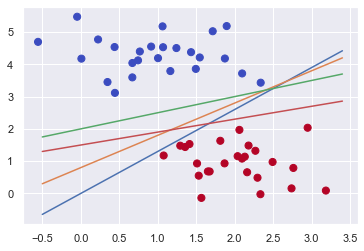

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm');
X_fit = np.arange(-0.5, 3.5, 0.1)
plt.plot(X_fit, X_fit*1.3); plt.plot(X_fit, 0.8+X_fit*1);
plt.plot(X_fit, 2+X_fit*0.5);plt.plot(X_fit, 1.5+X_fit*0.4)

In [4]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim(); ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1], 30); y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], 
               alpha=0.5, linestyles=['--', '-', '--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                 s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim); ax.set_ylim(ylim)

SVC(kernel='linear', random_state=11)

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

array([[ 0.22967329, -1.37758262]])

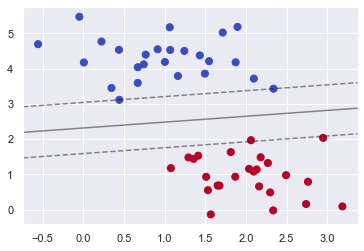

In [5]:
from sklearn.svm import SVC 
model = SVC(kernel='linear', random_state=11)
model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
plot_svc_decision_function(model);
model.support_vectors_; 
model.coef_

## SVM 알고리즘

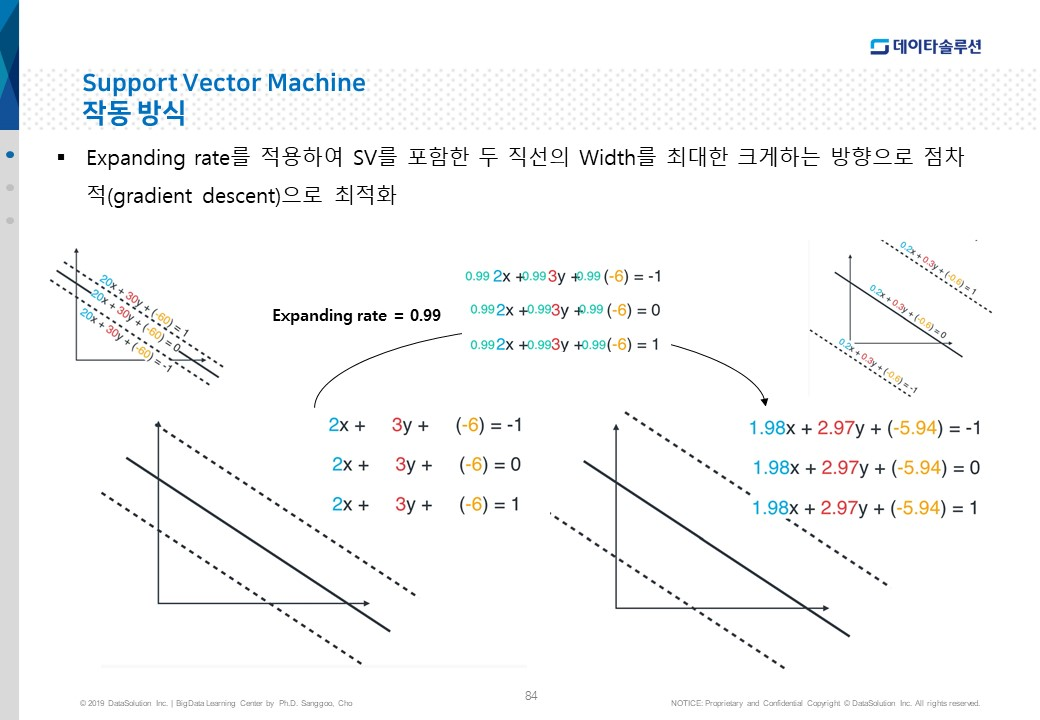

In [6]:
import os
os.chdir('D:/2021_데이터솔루션/발표자료/Python_데이터과학_머신러닝_20210823/')
from IPython.display import Image
width=1000; height=500
Image(filename='슬라이드84.jpg', width=width, height=height)

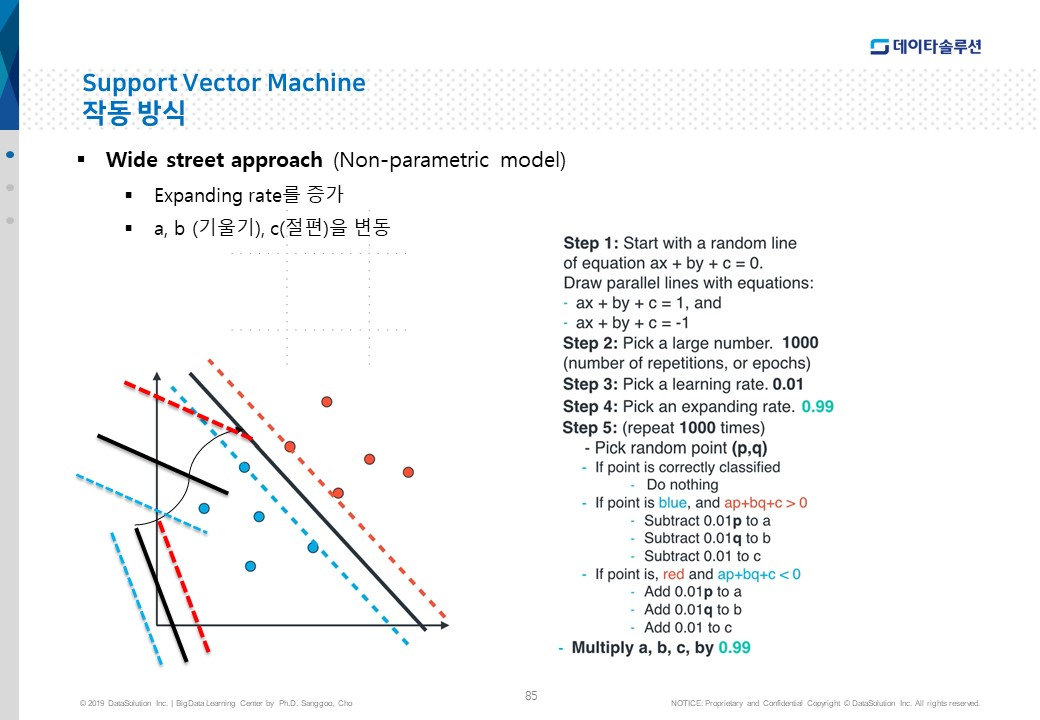

In [7]:
Image(filename='슬라이드85.jpg', width=width, height=height)

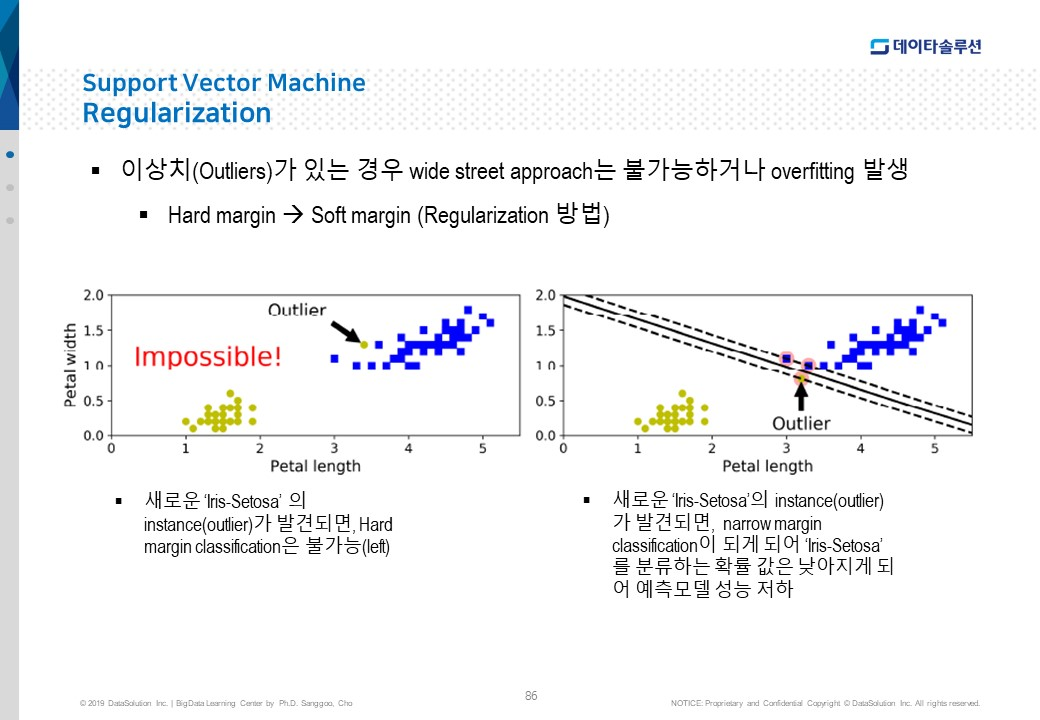

In [8]:
Image(filename='슬라이드86.jpg', width=width, height=height)

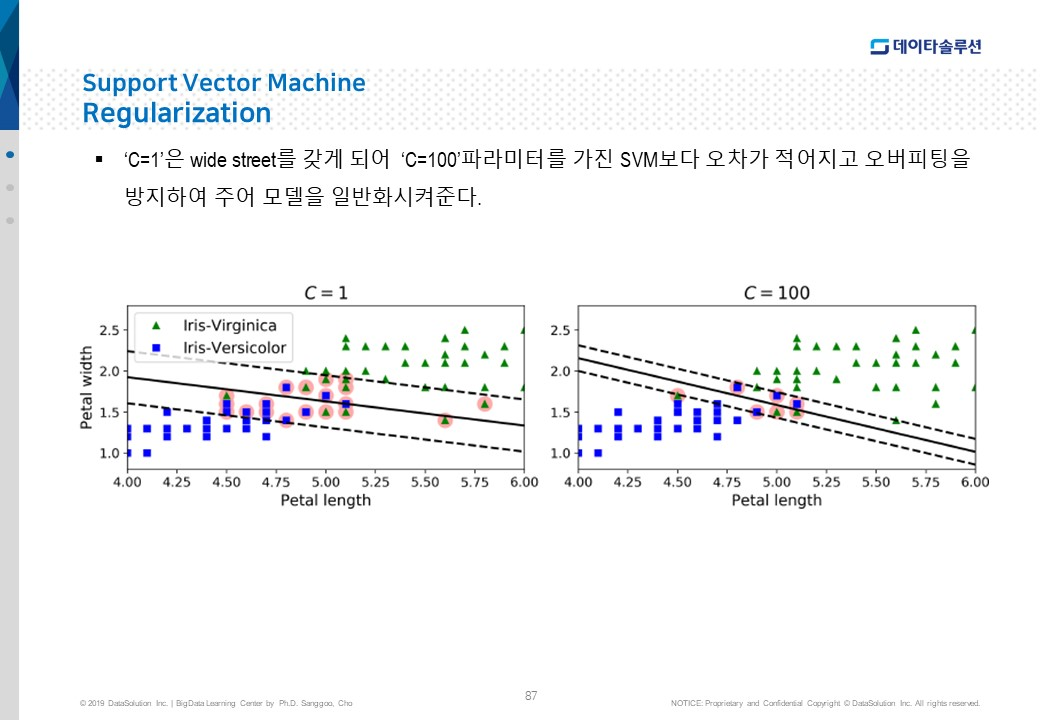

In [9]:
Image(filename='슬라이드87.jpg', width=width, height=height)

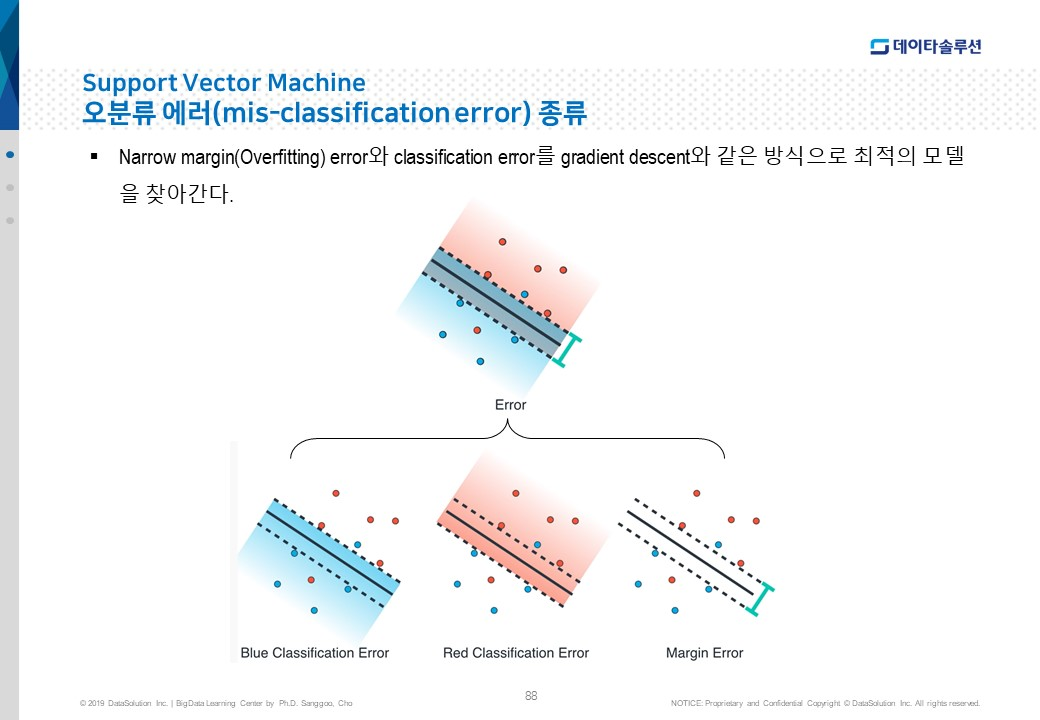

In [10]:
Image(filename='슬라이드88.jpg', width=width, height=height)

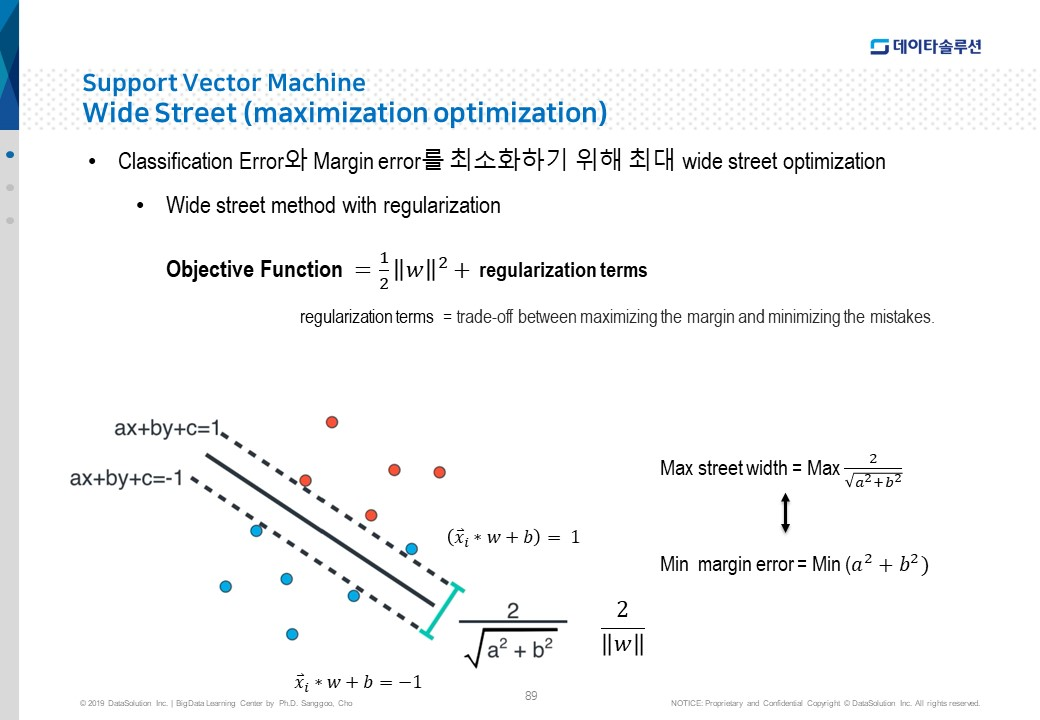

In [11]:
Image(filename='슬라이드89.jpg', width=width, height=height)

<img src= 'https://wikimedia.org/api/rest_v1/media/math/render/svg/3fbc23e60483b1d9b0ea2b9fc378db02e33e4c50'>

# What is kernel and kernel trick?

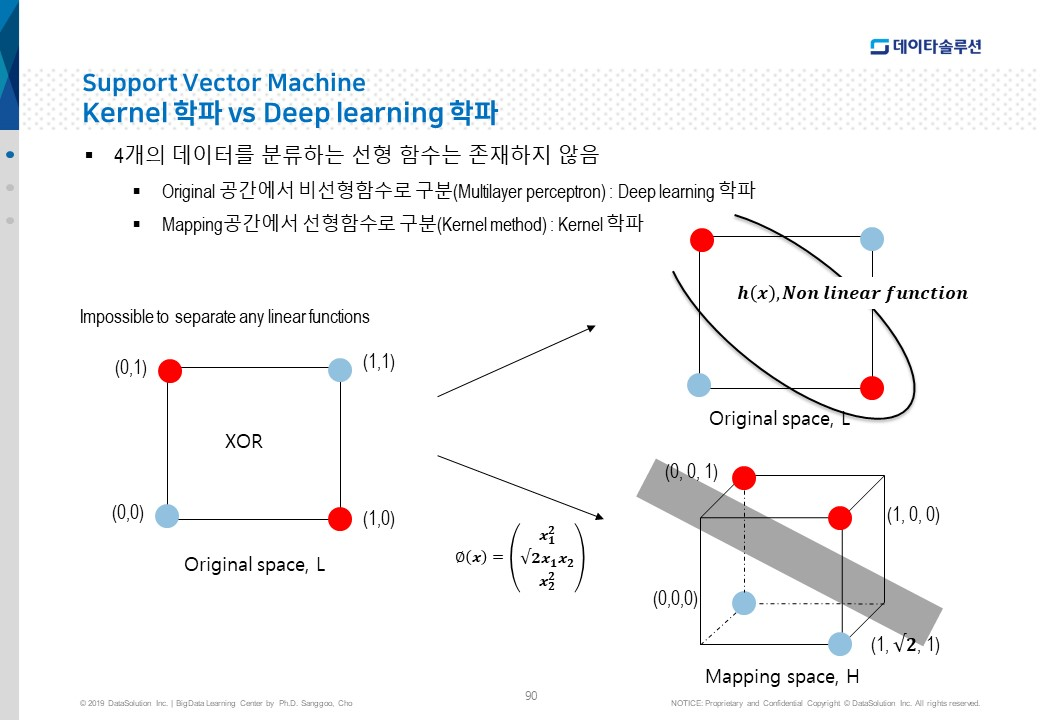

In [12]:
Image(filename='슬라이드90.jpg', width=width, height=height)

Text(0.5, 0, 'x1')

Text(0, 0.5, 'x2')

Text(0.5, 1.0, 'Problem')

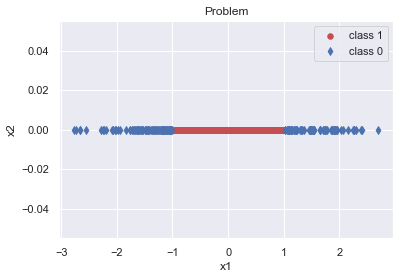

In [13]:
np.random.seed(0)
X = np.random.randn(500)
tr = 1
X_pos = X[np.logical_and(X<tr, X>-tr)]
X_neg = X[np.logical_or(X>=tr, X<=-tr)]
plt.scatter(X_pos, y=X_pos*0, c='r', marker='o', label='class 1', s=30)
plt.scatter(X_neg, y=X_neg*0, c='b', marker='d', label='class 0', s=30)
plt.legend(); plt.xlabel('x1'); plt.ylabel('x2'); plt.title('Problem')

Text(0.5, 0, '$\\phi_1$')

Text(0, 0.5, '$\\phi_2$')

Text(0.5, 1.0, 'Problem solving in Transformed higer Space')

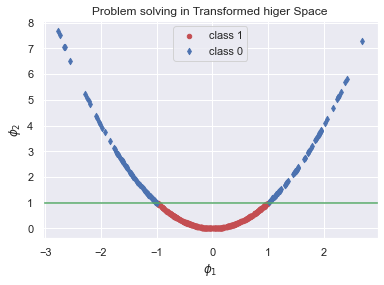

In [14]:
plt.scatter(X_pos, y=X_pos**2, c='r', marker='o', label='class 1', s=20)
plt.scatter(X_neg, y=X_neg**2, c='b', marker='d', label='class 0', s=20)
plt.legend(); plt.xlabel(r'$\phi_1$'); plt.ylabel(r'$\phi_2$')
plt.title('Problem solving in Transformed higer Space')
plt.axhline(y= tr, color='g', linestyle='-')

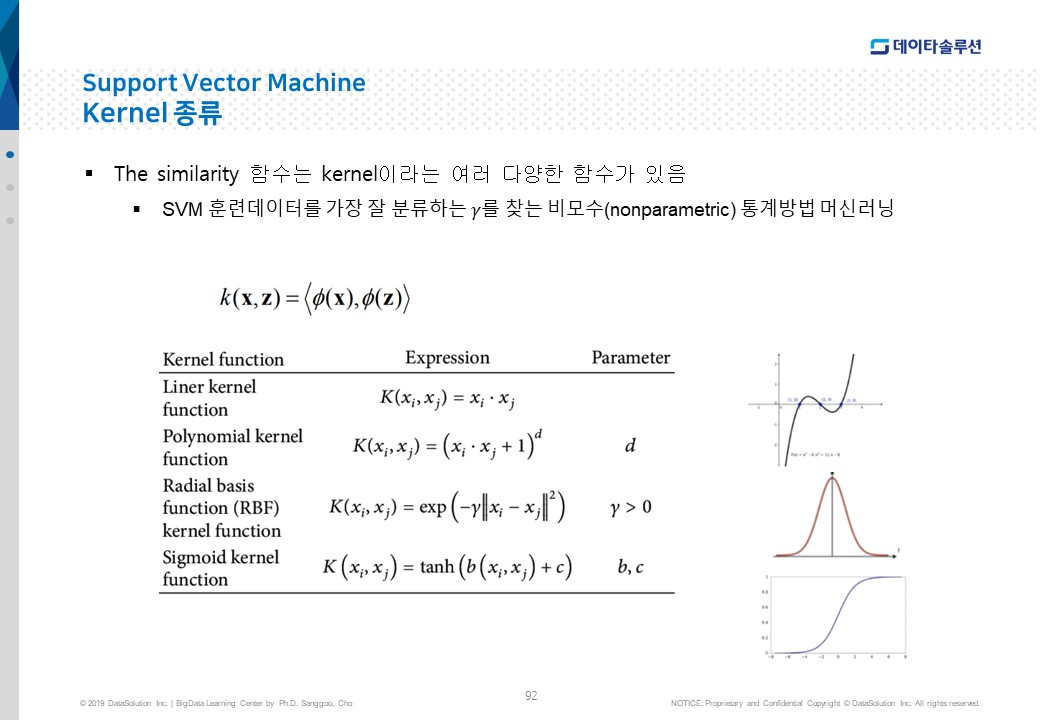

In [15]:
Image(filename='슬라이드92.jpg', width=width, height=height)

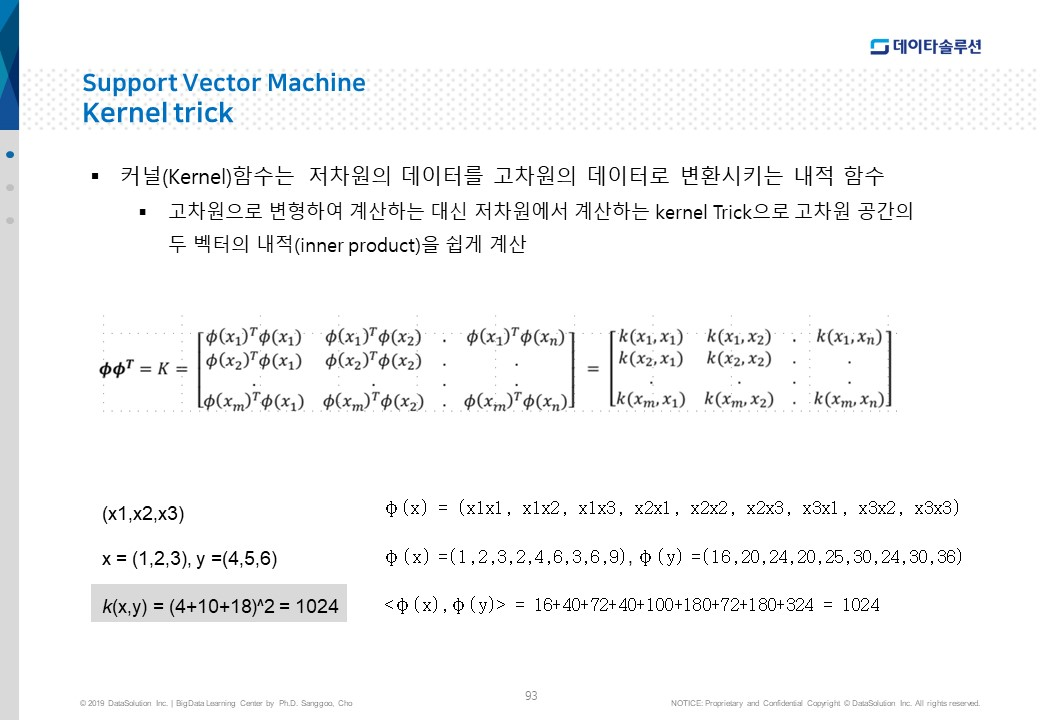

In [16]:
Image(filename='슬라이드93.jpg', width=width, height=height)

In [17]:
x = np.array([1,2,3]); y = np.array([4,5,6])
x_t = x.reshape(-1,1); x = x.reshape(1,-1)
q_x = x_t@x
q_x

y_t = y.reshape(-1,1); y = y.reshape(1,-1)
q_y = y_t@y
q_y

q_x * q_y
(q_x * q_y).sum()

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

array([[16, 20, 24],
       [20, 25, 30],
       [24, 30, 36]])

array([[ 16,  40,  72],
       [ 40, 100, 180],
       [ 72, 180, 324]])

1024

In [18]:
x = np.array([1,2,3]); y = np.array([4,5,6])
sum((x*y))**2 # kernel function
np.dot(x,y)**2

1024

1024

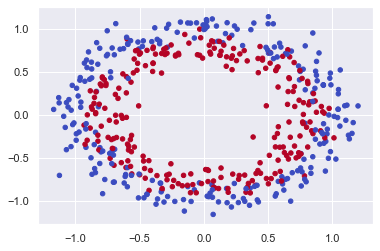

In [19]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=500, random_state=11, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='coolwarm');

<Figure size 576x432 with 0 Axes>

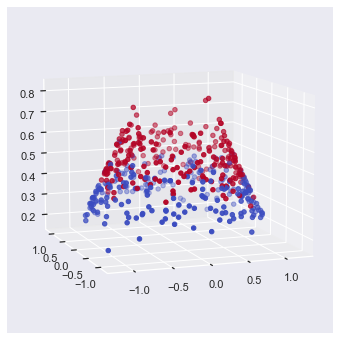

In [20]:
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))
plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, cmap='coolwarm')
ax.view_init(10, 250)

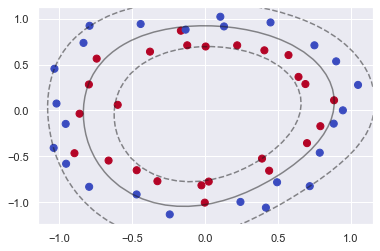

In [21]:
X, y = make_circles(n_samples=50, random_state=11, noise=0.1)
model = SVC(kernel='rbf')
model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
plot_svc_decision_function(model);

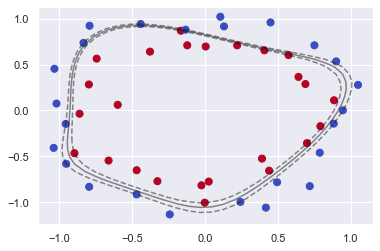

In [22]:
model = SVC(kernel='rbf', C=1E10)
model.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
plot_svc_decision_function(model);

# Kernel density estimation
https://en.wikipedia.org/wiki/Positive-definite_kernel

### 1. 정규분포를 가정하여 2개의 서로 다른 모집단에서 자료를 관측할 경우 Histogram
- 평균과 분산이 각각 (0, 4), (10, 1) 가우시안 분포를 갖는 2개 그룹 

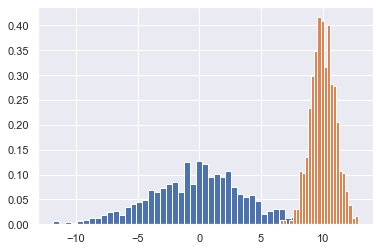

In [23]:
mu = 0; sigma = 4; N =1000
h = np.random.normal(mu, sigma, N)
j = np.random.normal(mu+10, sigma-3, N)
ax = plt.hist(h, 50, density=True)
ax = plt.hist(j, 25, density=True)

### 2. Kernel density Estimation(Clustering)
- 서로 다른 2개의 그룹에서 관찰된 사실을 모른다는 가정에서 
- 자료의 밀도만 관찰하여 clustering을 하는 Density estimation
- 자료가 모두 정규분포에서 나왔다고 가정하여 KDE 커널로 Clustering

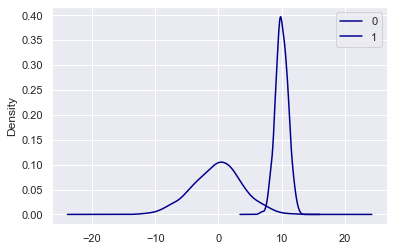

In [24]:
import pandas as pd
ax = pd.DataFrame(np.c_[h, j]).plot.kde(c='DarkBlue')  # kde kernel density estimation

### 3. 정규분포를 가정하여 확률밀도함수(Probability density function, pdf)로 예측
- 관측된 데이터를 pdf로 변환한 것은 Kernel function을 적용하여 Fitting(Traning) 한 것임
- Kernel transformation (Gaussian pdf kernel)

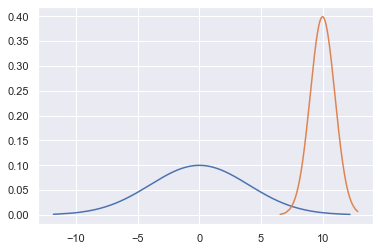

In [25]:
import scipy.stats as stats
h = sorted(h); j = sorted(j)
fit_h = stats.norm.pdf(h, mu, sigma) # it is a fitting! probability density function
fit_j = stats.norm.pdf(j, mu+10, sigma-3) # it is a fitting! probability density function
plt.plot(h, fit_h)
plt.plot(j, fit_j)

In [26]:
pd.DataFrame(np.c_[h, fit_h, j, fit_j], 
                   columns = ['h', 'fit_h_gn(0,4)', 'j', 'fit_j_gn(10, 1)'])

,h,"fit_h_gn(0,4)",j,"fit_j_gn(10, 1)"
0,-11.846601,0.001242,6.559426,0.001073
1,-11.665540,0.001419,6.777873,0.002221
2,-11.571177,0.001520,6.945670,0.003760
3,-10.458387,0.003269,7.048911,0.005126
4,-10.435767,0.003318,7.350409,0.011925
...,...,...,...,...
995,9.827316,0.004877,12.462675,0.019229
996,10.403517,0.003388,12.608326,0.013292
997,10.607253,0.002964,12.630077,0.012556
998,11.646466,0.001439,12.697353,0.010496


### 5. 자료를 Gaussian RBF(Kernel)을 사용하여 pdf로 변환 
- Nonlinear SVM classification (Hands-on Macjine learning, O'RRELY Book
#### x1  = 수열 자료(-5 ~ +5)
#### x2, x3 = x1자료에 해당되는 정규분포를 pdf 자료2, 3 생성자료

In [27]:
x1 = np.arange(-4, 5, 1)
x2 = stats.norm.pdf(x1, -2, 1); x3 = stats.norm.pdf(x1, 1, 1)
data = pd.DataFrame(np.c_[x1, x2, x3], columns = ['x1', 'x2', 'x3'])
data.set_index('x1', inplace=True)
data.round(2).head()

,x2,x3
x1,,
-4.0,0.05,0.00
-3.0,0.24,0.00
-2.0,0.40,0.00
-1.0,0.24,0.05
0.0,0.05,0.24


<AxesSubplot:xlabel='x1'>

Text(0, 0.5, 'Similarity')

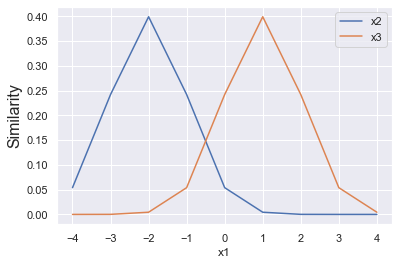

In [28]:
data[['x2', 'x3']].plot()
plt.ylabel('Similarity', fontsize = 16)

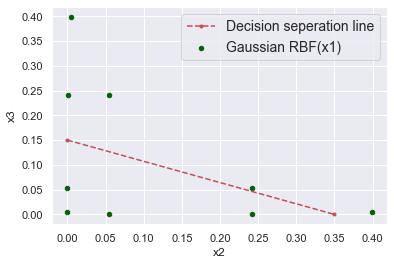

In [29]:
ax1 = data.plot.scatter(x='x2', y='x3', c='DarkGreen', label='Gaussian RBF(x1)')
plt.plot([0,0.35], [0.15,0.00], 'r.--', label='Decision seperation line')
plt.legend(fontsize = 14)

### Similarity (Likelihood)
- TN와 TP의 영역에 있는 x1의 RBF변환값은 x2, x3가 둘중 하나는 '0'에 가까움
- FN와 FP의 영역에 있는 x1의 RBF변환값은 x2, x3가 모두 '0' 보다 상당히 크다
- if x1= -1,   x2=0.25, x3=0.05로 좌표 이동, 즉 x1=-1은 x2와 가깝다(similarity가 높다) 

## 데이터 읽고 훈련시험 데이터 준비
https://www.kaggle.com/faressayah/predicting-heart-disease-using-machine-learning/data

In [30]:
df = pd.read_csv('../data/heart.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/heart.csv'

In [ ]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [ ]:
df.isna().sum().sum()

In [ ]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 4), 
                                                   title="Correlation with target")

In [ ]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [ ]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    ax = df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    bx = df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    ax = df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    bx= df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [ ]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)
dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 1. No hyperparameter tuning
### 로지스틱 회귀분석

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

## 서포트벡터머신

In [ ]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]],
                            columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

## 2. Hyperparameter tuning
### 로지스틱 회귀분석

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df = results_df.append(tuning_results_df, ignore_index=True)
results_df

## 서포트벡터머신

In [ ]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df = results_df.append(results_df_2, ignore_index=True)
results_df

In [ ]:
kf = KFold(n_splits=5)
params = {'C': np.arange(0.001, 1000, 10),
          'gamma': np.arange(0.001, 1000, 10),
          'kernel': ['linear', 'rbf']}
svc = SVC(max_iter=1000, random_state=11)
grid=RandomizedSearchCV(svc, params, cv=kf, 
                        scoring='accuracy', verbose=True)
grid.fit(X_train, y_train)

In [ ]:
print('optimal train score: {:.3f}'.format(grid.best_score_))
print('test score: {:.3f}'.format(grid.score(X_test, y_test)))
print('optimal parameter: {}'.format(grid.best_params_))

In [ ]:
test_score = accuracy_score(y_test, grid.predict(X_test)) * 100
train_score = accuracy_score(y_train, grid.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned_RandomgridCV Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df = results_df.append(results_df_2, ignore_index=True)
results_df

### It seems that the results doesn't improved a lot after hyperparamter tuning. Maybe because the dataset is small.

In [ ]:
model = grid.best_estimator_
y_predict = model.predict(X_test)
y_scores = model.decision_function(X_test)
y_predict[0:10]
y_scores[0:10]

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
print(classification_report(y_test, y_predict))
plot_confusion_matrix(model, X_test, y_test, normalize='true')

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
auc = roc_auc_score(y_test, y_scores)
ap = average_precision_score(y_test, y_scores)
print('AUROC :', round(auc * 100, 2)); print('AP Mean :', round(ap * 100, 2))

In [ ]:
sns.set()
from sklearn.metrics import plot_precision_recall_curve
svc_disp = plot_roc_curve(grid, X_test, y_test)
ap = average_precision_score(y_test, y_scores)
svc_disp = plot_precision_recall_curve(grid, X_test, y_test)
svc_disp.ax_.set_title('Precision-Recall curve: ' 'AP={0:0.2f}'.format(ap))

In [ ]:
import os
os.makedirs('../data', exist_ok=True)
os.makedirs('../output', exist_ok=True)

In [ ]:
dump(model, '../output/svc.joblib')

# END